<a href="https://colab.research.google.com/github/smridhiwho/asteroid-tracking/blob/main/asteroid_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/smridhiwho/asteroid-tracking/main/asteroid.csv"
df = pd.read_csv(url)
df=df.drop(['Asteroid Number'],axis=1)
df.rename(columns = {'YYYY-mmm-DD':'Approach Date'}, inplace = True)
df

,Asteroid,N-sig,Ref.,Approach Date,MMD(AU),Vrel(km/s)
0,1999 TO13,280,JPL#13,10-05-1999,0.0312,14.96
1,1999 SG10,690,JPL#22,10/14/1999,0.0909,19.77
2,1999 UR,320,JPL#02,10/22/1999,0.0470,10.01
3,1999 VF22,300,JPL#02,10/31/1999,0.0372,25.54
4,1999 VR6,110,JPL#04,11/18/1999,0.0759,21.58
...,...,...,...,...,...,...
493,Ptah,100000,JPL#08,03-04-2099,0.1219,9.63
494,Orpheus,180000,JPL#04,4/26/2099,0.1207,12.18
495,1997 BR,770000,JPL#05,6/25/2099,0.1912,10.24
496,Asclepius,59000,JPL#04,8/23/2099,0.0453,10.28


#Clustering
To group similar asteroids based on their Minimum Approach distance and relative velocity.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

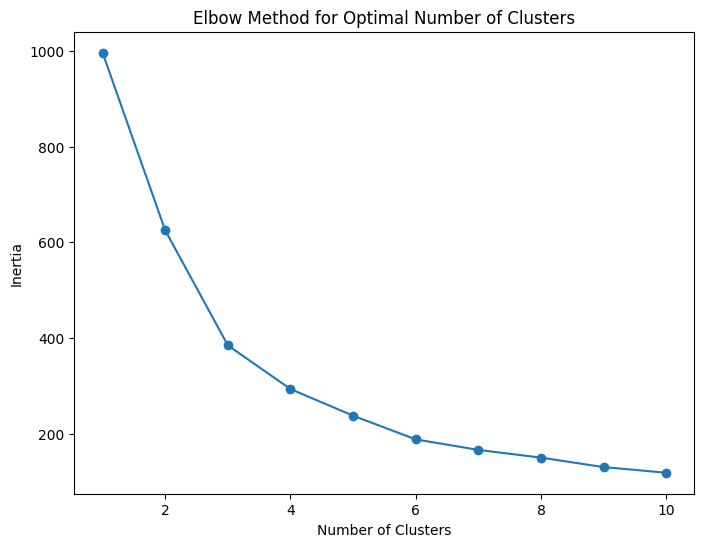

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



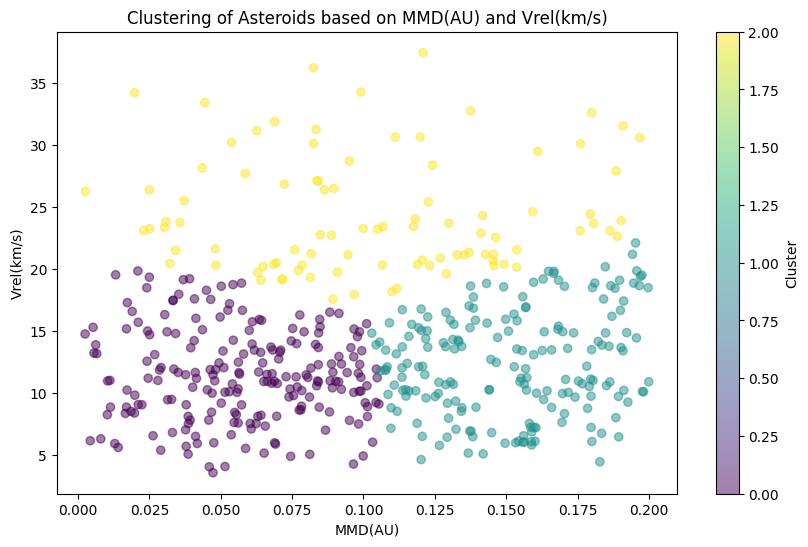

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['MMD(AU)', 'Vrel(km/s)']

# Extract feature values
X = df[features].values

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to help choose the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 3  # Adjust as needed

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['MMD(AU)'], df['Vrel(km/s)'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Asteroids based on MMD(AU) and Vrel(km/s)')
plt.xlabel('MMD(AU)')
plt.ylabel('Vrel(km/s)')
plt.colorbar(label='Cluster')
plt.show()


#Time Series Analysis:
Given the "Approach Date" and potentially other features, you can perform time series analysis to forecast the future "MMD(AU)" or "Vrel(km/s)" values for asteroids.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Mean Squared Error: 0.01


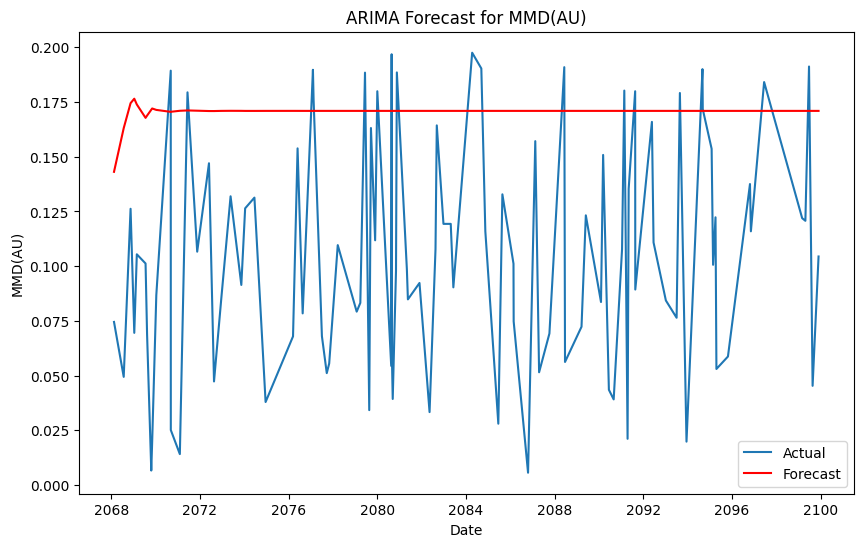

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Convert 'Approach Date' column to datetime format
df['Approach Date'] = pd.to_datetime(df['Approach Date'])

# Set 'Approach Date' as the index
df.set_index('Approach Date', inplace=True)

# Extract 'MMD(AU)' column for time series analysis
ts_data = df['MMD(AU)']

# Train-test split
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values
forecast_values = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast_values)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_values, color='red', label='Forecast')
plt.title('ARIMA Forecast for MMD(AU)')
plt.xlabel('Date')
plt.ylabel('MMD(AU)')
plt.legend()
plt.show()
